# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [215]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


names = []
country= []
cloudiness = []
dates = []
humidity = []
lat = []
long = []
temps = []
wind_speed = []


test_cities = len(cities)

i = 1

for city in cities:
    try:
        print(f"Processing {city} -- number {i} of {test_cities}....")
        i += 1
        response = requests.get(query_url + city).json()
        names.append(response['name'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
    
    except:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing neuquen -- number 1 of 603....
Processing hobart -- number 2 of 603....
Processing dikson -- number 3 of 603....
Processing a -- number 4 of 603....
City not found. Skipping...
Processing east london -- number 5 of 603....
Processing karaikkudi -- number 6 of 603....
Processing parker -- number 7 of 603....
Processing atuona -- number 8 of 603....
Processing jamestown -- number 9 of 603....
Processing rikitea -- number 10 of 603....
Processing vaitupu -- number 11 of 603....
City not found. Skipping...
Processing upernavik -- number 12 of 603....
Processing ruteng -- number 13 of 603....
Processing lebu -- number 14 of 603....
Processing busselton -- number 15 of 603....
Processing berlevag -- number 16 of 603....
Processing torbay -- number 17 of 603....
Processing watsa -- number 18 of 603....
Processing mar del plata -- number 19 of 603....
Processing bilibino -- number 20 of 603....
Processing xichang -- number 21 of 603....
Processing baghdad -- number 22 of 603....
Pro

Processing gasa -- number 177 of 603....
Processing ashtian -- number 178 of 603....
Processing satitoa -- number 179 of 603....
City not found. Skipping...
Processing xai-xai -- number 180 of 603....
Processing rio verde de mato grosso -- number 181 of 603....
Processing chernyshevskiy -- number 182 of 603....
Processing narsaq -- number 183 of 603....
Processing karaul -- number 184 of 603....
City not found. Skipping...
Processing geraldton -- number 185 of 603....
Processing barcelona -- number 186 of 603....
Processing bahia honda -- number 187 of 603....
Processing belushya guba -- number 188 of 603....
City not found. Skipping...
Processing hailar -- number 189 of 603....
Processing bayan -- number 190 of 603....
Processing riberalta -- number 191 of 603....
Processing marsa matruh -- number 192 of 603....
Processing lorengau -- number 193 of 603....
Processing lasa -- number 194 of 603....
Processing coahuayana -- number 195 of 603....
Processing blyth -- number 196 of 603....


Processing cabo san lucas -- number 352 of 603....
Processing sidi ali -- number 353 of 603....
Processing coihaique -- number 354 of 603....
Processing mogadishu -- number 355 of 603....
Processing tarauaca -- number 356 of 603....
Processing hay river -- number 357 of 603....
Processing kamina -- number 358 of 603....
Processing mahadday weyne -- number 359 of 603....
City not found. Skipping...
Processing tumannyy -- number 360 of 603....
City not found. Skipping...
Processing banyo -- number 361 of 603....
Processing swan hill -- number 362 of 603....
Processing hailey -- number 363 of 603....
Processing malwan -- number 364 of 603....
City not found. Skipping...
Processing tasiilaq -- number 365 of 603....
Processing san blas -- number 366 of 603....
Processing tarudant -- number 367 of 603....
City not found. Skipping...
Processing gopalpur -- number 368 of 603....
Processing manggar -- number 369 of 603....
Processing eureka -- number 370 of 603....
Processing fort nelson -- num

Processing vanimo -- number 522 of 603....
Processing bay-khaak -- number 523 of 603....
Processing mae sot -- number 524 of 603....
Processing marrakesh -- number 525 of 603....
Processing hobyo -- number 526 of 603....
Processing portland -- number 527 of 603....
Processing chenzhou -- number 528 of 603....
Processing ucluelet -- number 529 of 603....
Processing yerbogachen -- number 530 of 603....
Processing curico -- number 531 of 603....
Processing sataua -- number 532 of 603....
City not found. Skipping...
Processing qostanay -- number 533 of 603....
Processing bandarbeyla -- number 534 of 603....
Processing lazaro cardenas -- number 535 of 603....
Processing bartica -- number 536 of 603....
Processing port hardy -- number 537 of 603....
Processing vyartsilya -- number 538 of 603....
Processing heze -- number 539 of 603....
Processing vardo -- number 540 of 603....
Processing sorland -- number 541 of 603....
Processing utiroa -- number 542 of 603....
City not found. Skipping...
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
city_info = {
    "City": names,
    "Country": country,
    "Max Temp": temps,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Latitude": lat,
    "Longitude": long,
    "Date": dates
}

In [58]:
city_weather = pd.DataFrame(city_info) 

city_weather.head()

,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
0,Neuquén,AR,46.40,81,0,8.05,-38.9516,-68.0591,1618632636
1,Hobart,AU,63.00,51,75,14.97,-42.8794,147.3294,1618632569
2,Dikson,RU,-2.63,88,99,5.30,73.5069,80.5464,1618632511
3,East London,ZA,55.40,71,0,6.91,-33.0153,27.9116,1618632337
4,Karaikudi,IN,86.74,64,70,6.73,10.0667,78.7833,1618632636


In [146]:
city_weather.to_csv('output_data_file.csv',header = True)

# Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [60]:
humidity_test = city_weather["Humidity"].describe()
humidity_test

count    556.000000
mean      70.203237
std       22.480503
min        7.000000
25%       60.000000
50%       75.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [56]:
#  Get the indices of cities that have humidity over 100%.

print("After analysis of the humidity data, the maximum humidity is 100%. As such, no cities have a humidity above 100%!")


After analysis of the humidity data, the maximum humidity is 100%. As such, no cities have a humidity above 100%!


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

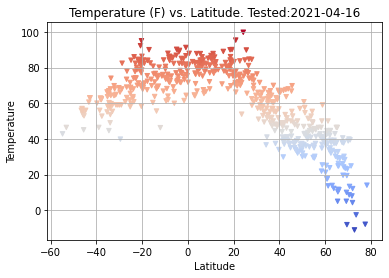

In [94]:
timestamp = city_weather["Date"].mean()
timestamp = date.fromtimestamp(timestamp)

plt.scatter(city_weather["Latitude"], city_weather["Max Temp"], c=city_weather["Max Temp"], s=20, cmap = "coolwarm", marker = "v")

plt.title(f"Temperature (F) vs Latitude. Tested:{timestamp}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()

In [151]:
plt.savefig('Temperature (F) vs Latitude.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

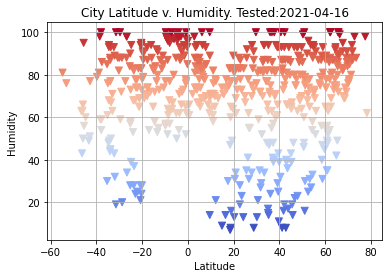

In [98]:
plt.scatter(city_weather["Latitude"], city_weather["Humidity"], c=city_weather["Humidity"], s=50, cmap = "coolwarm", marker = "v")

plt.title(f"City Latitude vs Humidity. Tested:{timestamp}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

In [152]:
plt.savefig('Latitude vs. Humidity.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

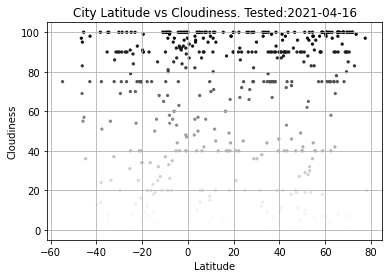

In [120]:
plt.scatter(city_weather["Latitude"], city_weather["Cloudiness"], c=city_weather["Cloudiness"], s=5, cmap = "Greys", marker = "o")

plt.title(f"City Latitude vs Cloudiness. Tested:{timestamp}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

In [153]:
plt.savefig('Latitude vs. Cloudiness.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

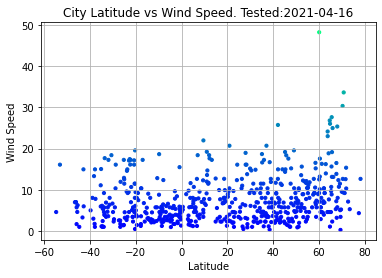

In [121]:
plt.scatter(city_weather["Latitude"], city_weather["Wind Speed"], c=city_weather["Wind Speed"], s=10, cmap = "winter", marker = "o")

plt.title(f"City Latitude vs Wind Speed. Tested:{timestamp}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

In [154]:
plt.savefig('Latitude vs. Wind Speed.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [130]:
def linear_reg(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Latitude']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The correlation between {title_name} is {rvalue}")
    
northern_hemisphere = city_weather.loc[city_weather['Latitude'] > 0, :]
southern_hemisphere = city_weather.loc[city_weather['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Temp vs Latitude in the Northern Hemisphere Regression is -0.8834917676375807


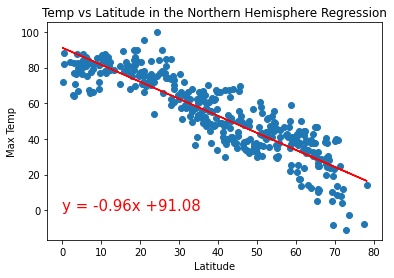

In [198]:
linear_reg(northern_hemisphere, 'Temp vs Latitude in the Northern Hemisphere Regression', 'Max Temp', 'Max Temp', 'output_data/NorthernTempVsLatitude.png', (0,0))

In [199]:
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Temp vs Latitude in the Southern Hemisphere Regression is 0.6408953812319446


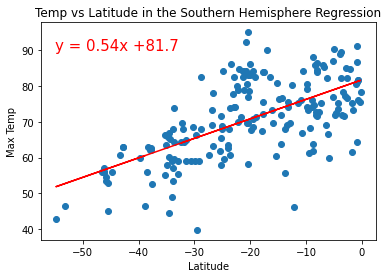

In [200]:
linear_reg(southern_hemisphere, 'Temp vs Latitude in the Southern Hemisphere Regression', 'Max Temp', 'Max Temp', 'output_data/SouthernTempVsLatitudeReg.png', (-55,90))

In [201]:
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity(%) vs Latitude in the Northern Hemisphere Regression is 0.10192203988715957


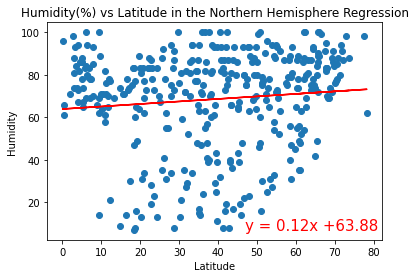

In [202]:
linear_reg(northern_hemisphere, 'Humidity(%) vs Latitude in the Northern Hemisphere Regression', 'Humidity', 'Humidity', 'output_data/NorthernHumidityvsLatitude.png', (47,7))

In [203]:
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity(%) vs Latitude in the Southern Hemisphere Regression is 0.2571271705724484


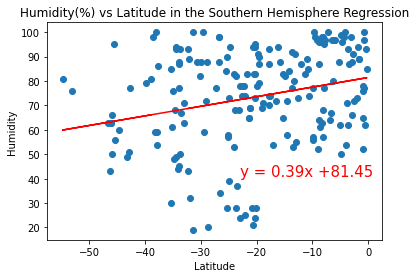

In [204]:
linear_reg(southern_hemisphere, 'Humidity(%) vs Latitude in the Southern Hemisphere Regression', 'Humidity', 'Humidity', 'output_data/SouthernHumidityvsLatitude.png', (-23,41))

In [205]:
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness(%) vs Latitude in the Northern Hemisphere Regression is 0.04249696879958699


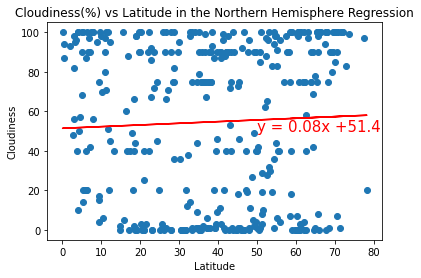

In [206]:
linear_reg(northern_hemisphere, 'Cloudiness(%) vs Latitude in the Northern Hemisphere Regression', 'Cloudiness', 'Cloudiness', 'output_data/NorthernCloudinessvsLatitude.png', (50,50))

In [207]:
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness(%) vs Latitude in the Southern Hemisphere Regression is 0.2832282589090678


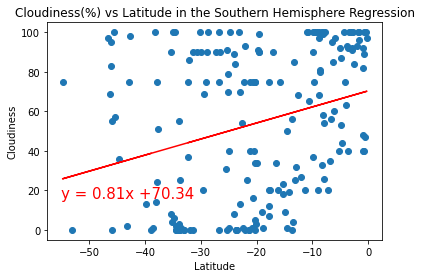

In [208]:
linear_reg(southern_hemisphere, 'Cloudiness(%) vs Latitude in the Southern Hemisphere Regression', 'Cloudiness', 'Cloudiness', 'output_data/SouthernCloudinessvsLatitude.png', (-55,16))

In [209]:
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed(mph) vs Latitude in the Northern Hemisphere Regression is 0.215400996020592


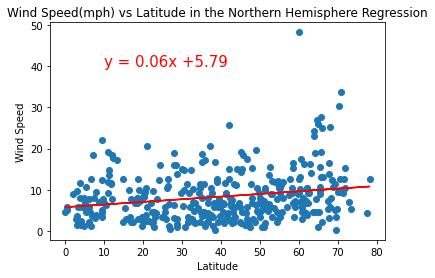

In [210]:
linear_reg(northern_hemisphere, 'Wind Speed(mph) vs Latitude in the Northern Hemisphere Regression', 'Wind Speed', 'Wind Speed', 'output_data/NorthernWind_SpeedvsLatitude.png', (10,40))

In [211]:
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed(mph) vs Latitude in the Southern Hemisphere Regression is -0.18310041750663844


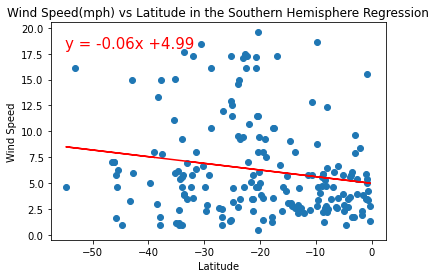

In [212]:
linear_reg(southern_hemisphere, 'Wind Speed(mph) vs Latitude in the Southern Hemisphere Regression', 'Wind Speed', 'Wind Speed', 'output_data/SouthernWind_SpeedvsLatitude.png',(-55,18))

In [213]:
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>